In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dftools
import scipy.stats

Welcome to JupyROOT 6.18/00


In [2]:
plt.style.use('cms')

In [3]:
store = pd.HDFStore("fit_results.h5")
print(store.keys())
store.close()

['/ImpactsAsimov', '/ImpactsObserved', '/ScanAsimov', '/ScanObserved', '/ScanStat']


              parameter_bf  parameter_value       dnll
parameter                                             
rZJetsToNuNu      1.019219            0.800  59.441105
rZJetsToNuNu      1.019246            0.804  57.115801
rZJetsToNuNu      1.019198            0.808  54.843945
rZJetsToNuNu      1.019218            0.812  52.627360
rZJetsToNuNu      1.019213            0.816  50.463086
...                    ...              ...        ...
rZJetsToNuNu      1.019213            1.184  23.573593
rZJetsToNuNu      1.021069            1.188  24.636140
rZJetsToNuNu      1.019222            1.192  25.803513
rZJetsToNuNu      1.021086            1.196  26.894692
rZJetsToNuNu      1.021072            1.200  28.056660

[101 rows x 3 columns]
              parameter_bf  parameter_value         dnll
parameter                                               
rZJetsToNuNu      1.020976            0.800  1738.807980
rZJetsToNuNu      1.020976            0.804  1666.881763
rZJetsToNuNu      1.020976       

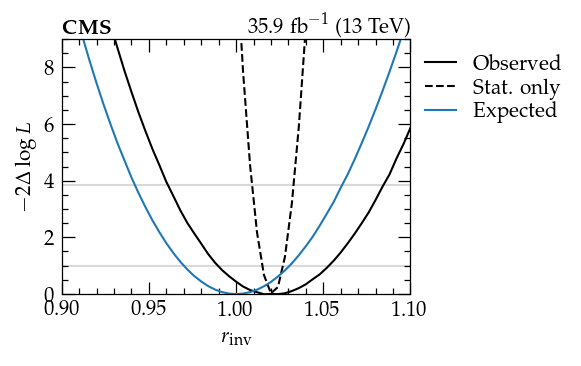

In [36]:
obs = pd.read_hdf("fit_results.h5", "ScanObserved")
exp = pd.read_hdf("fit_results.h5", "ScanAsimov")
stat = pd.read_hdf("fit_results.h5", "ScanStat")

fig, ax = plt.subplots(
    figsize=(3, 2.25), dpi=150,
)

ax.plot(
    obs["parameter_value"], obs["dnll"],
    lw=1, color='black',
    label="Observed",
)
ax.plot(
    stat["parameter_value"], stat["dnll"],
    lw=1, color='black', ls='--',
    label="Stat. only",
)
ax.plot(
    exp["parameter_value"], exp["dnll"],
    lw=1, color='#1f78b4',
    label="Expected",
)

dftools.draw.cms_label(ax, "")
ax.legend(
    loc=2, bbox_to_anchor=(1,1),
    labelspacing=0.1, borderpad=0.2,
)

ax.axhline(
    scipy.stats.chi2.ppf(0.68, df=1),
    lw=1, color='#d9d9d9',
    zorder=-1,
)
ax.axhline(
    scipy.stats.chi2.ppf(0.95, df=1),
    lw=1, color='#d9d9d9',
    zorder=-1,
)

ax.set_xlim(0.9, 1.1)
ax.set_ylim(0., 9.)

ax.set_xlabel(r'$r_{\mathrm{inv}}$')
ax.set_ylabel(r'$-2\Delta\log L$')
fig.savefig("plots/scan-1d.pdf")

pass

In [5]:
store = pd.HDFStore("fit_results.h5")
print(store.keys())
store.close()

['/ImpactsAsimov', '/ImpactsObserved', '/ScanAsimov', '/ScanObserved', '/ScanStat']


In [6]:
sm = 501.44
sm_err = 0.04
bf = pd.read_hdf("fit_results.h5", "ImpactsObserved").loc[("rZJetsToNuNu", "rZJetsToNuNu"), "param_value"]*sm
bf_err_up = pd.read_hdf("fit_results.h5", "ImpactsObserved").loc[("rZJetsToNuNu", "rZJetsToNuNu"), "poi_paramup"]*sm
bf_err_down = pd.read_hdf("fit_results.h5", "ImpactsObserved").loc[("rZJetsToNuNu", "rZJetsToNuNu"), "poi_paramdown"]*sm

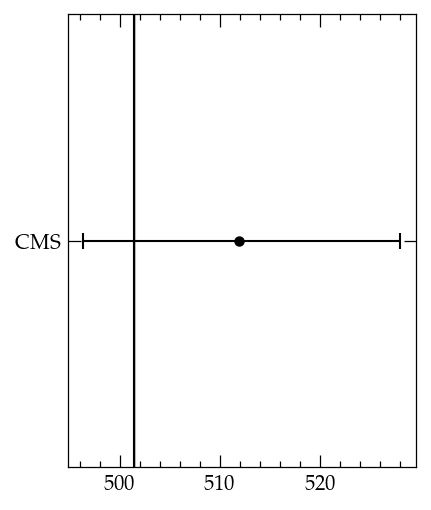

In [7]:
fig, ax = plt.subplots(
    figsize=(3, 4), dpi=150,
)

ax.errorbar(
    [bf], [0],
    xerr=([-bf_err_down], [bf_err_up]),
    fmt='o', color='black',
    ms=4, capsize=4,
)
ax.set_yticks([0])
ax.set_yticklabels([r'CMS'])

ax.axvline(sm, lw=1, color='black')
ax.axvspan(sm-sm_err, sm+sm_err, color='gray', alpha=0.5)
pass

In [9]:
df = pd.DataFrame([{
    "experiment": "CMS",
    "value": bf,
    "error_up": bf_err_up,
    "error_down": -bf_err_down,
}, {
    "experiment": "LEP Combined",
    "value": 503.,
    "error_up": 16.,
    "error_down": 16.,
}, {
    "experiment": "L3",
    "value": 498.,
    "error_up": np.sqrt(2)*12.,
    "error_down": np.sqrt(2)*12.,
}, {
    "experiment": "OPAL",
    "value": 539.,
    "error_up": np.sqrt(26.**2+17.**2),
    "error_down": np.sqrt(26.**2+17.**2),
}, {
    "experiment": "ALEPH",
    "value": 450.,
    "error_up": np.sqrt(2)*34.,
    "error_down": np.sqrt(2)*34.,
}])

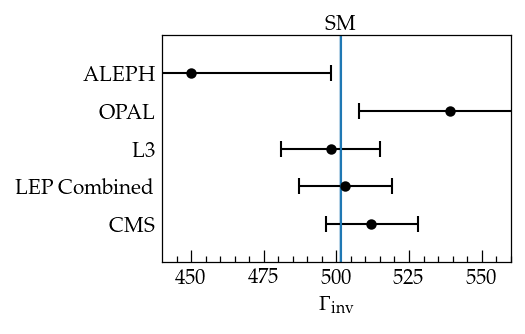

In [37]:
fig, ax = plt.subplots(
    figsize=(3, 2), dpi=150,
)

y = np.arange(0, df.shape[0], 1)
ax.errorbar(
    df["value"], y, xerr=(df["error_down"], df["error_up"]),
    fmt='o', color='black',
    ms=4, capsize=4,
)
ax.set_yticks(y)
ax.set_yticklabels(df["experiment"])

ax.text(sm, 5, r'SM', va='bottom', ha='center')

ax.axvline(sm, lw=1, color='#1f78b4')
ax.axvspan(sm-sm_err, sm+sm_err, color='#1f78b4', alpha=0.3)
ax.set_xlim(440., 560.)
ax.set_ylim(-1, 5)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='y', which='both', left=False)
ax.tick_params(axis='y', which='both', left=False)

ax.set_xlabel(r'$\Gamma_{\mathrm{inv}}$')
fig.savefig("plots/zinv.pdf")
pass

In [38]:
df

,experiment,value,error_up,error_down
0,CMS,511.945009,16.074216,15.578987
1,LEP Combined,503.000000,16.000000,16.000000
2,L3,498.000000,16.970563,16.970563
3,OPAL,539.000000,31.064449,31.064449
4,ALEPH,450.000000,48.083261,48.083261
